# Лабораторная работа по Вычислительной Математике

## Задачи

1) Сравнить численные решения, полученные по разностным схемам 
* Лакса (Л - L), 
* Куранта-Изаксона-Риса (КИР - CIR), 
* Лакса-Вендоффа (ЛВ - LF), 
* Уорминга-Кутлера-Ломакса (УКЛ - WCL)

для уравнения переноса в дивергентной и недивергентной формах:

$$\frac{∂ u}{∂ t} + u\frac{∂ u}{∂ x} = 0,$$

$$\frac{∂ u}{∂ t} + \frac{∂ (u^2/2)}{∂ x} = 0$$

Начальные профили представлены на рисунке

<p align=center><img src="./graph.png" height=300 width=800></p>

2) Исследовать сходимость численных решений по сетке (при $h → 0$, где $h$ $-$ шаг сетки)

## Теория

Зная, что $\frac{∂(u^2/2)}{∂x} = u\frac{∂u}{∂x}$, то

$$\frac{∂ u}{∂ t} + u\frac{∂ u}{∂ t} ≡ \frac{∂ u}{∂ t} + \frac{∂ (u^2)}{∂ t} = \frac{∂ u}{∂ t} + \frac{∂ f}{∂ t} = 0$$

**Схема Лакса**

Порядок аппроксимации: $O(\tau + h^2 + h^2/\tau)$

$$\frac{u^{n+1}_m - 0.5(u^n_{m+1} + u^n_{m-1})}{\tau} + \frac{f^n_{m+1} - f^n_{m-1}}{h} = 0$$

**Схема Куранта - Изаксона - Риса**

Порядок аппроксимации: $O(\tau + h)$

$$\frac{u^{n+1}_m + u^n_m}{\tau} + \frac{f^n_{m+1} - f^n_m}{h^2} = 0, \hspace{1cm} u^n_m < 0,$$
$$\frac{u^{n+1}_m + u^n_m}{\tau} + \frac{f^n_m - f^n_{m-1}}{h^2} = 0, \hspace{1cm} u^n_m > 0$$

**Схема Лакса-Вендоффа**

Порядок аппроксимации: $O(\tau ^2 + h^2)$

*1 шаг*
$$\frac{u^{n+1/2}_{m+1/2} - 0.5(u^n_{m+1} + u^n_{m-1})}{\tau /2} + \frac{f^n_{m+1} - f^n_m}{h^2} = 0,$$
$$\frac{u^{n+1/2}_{m-1/2} - 0.5(u^n_{m+1} + u^n_{m-1})}{\tau /2} + \frac{f^n_m - f^n_{m-1}}{h^2} = 0$$
*2 шаг*
$$\frac{u^{n+1}_m + u^n_m}{\tau} + \frac{f^{n+1/2}_{m+1/2} - f^{n+1/2}_{m-1/2}}{h^2} = 0$$

**Схема Уорминга-Кутлера-Ломакса**

Порядок аппроксимации: $O(\tau ^3 + h^3)$

*1 шаг*
$$\frac{u^{n+1/3}_m + u^n_m}{2\tau /3} + \frac{f^n_{m+1} - f^n_m}{h^2} = 0,$$
$$\frac{u^{n-1/3}_m + u^n_m}{2\tau /3} + \frac{f^n_m - f^n_{m-1}}{h^2} = 0$$
*2 шаг*
$$\frac{u^{n+2/3}_m + 0.5(u^n_m + u^{n+1/3}_m)}{\tau /2} + \frac{f^{n+1/3}_m - f^{n+1/3}_{m-1}}{h^2} = 0,$$
$$\frac{u^{n+2/3}_m + 0.5(u^n_m + u^{n+1/3}_m)}{\tau /2} + \frac{f^{n+1/3}_{m+1} - f^{n+1/3}_m}{h^2} = 0$$
*3 шаг*
$$\frac{u^{n+1}_m + u^n_m}{\tau} + \frac{3}{8}\frac{f^{n+1/3}_{m+1} - f^{n+1/3}_{m-1}}{h} + \frac{-2f^n_{m-2} + 7f^n_{m-1} - 7f^n_{m+1} + 2f^n_{m+2}}{h} + \frac{\omega}{24}(u^n_{m-2} - 4u^n_{m-1} + 6u^n_m - 4u^n_{m+1} + u^n_{m+2}) = 0,$$

где $\omega$ выбирается из условия: $4\sigma^2 - \sigma^4 < \omega < 3$ 

### Устойчивость

Разностные схемы для решения однородного линейного уравнения переноса ($\frac{∂ u}{∂ t} + \frac{∂ u}{∂ x} = 0$) являются устойчивыми, если число Куранта ($\sigma$) меньше или равно 1:

$$\sigma = \tau/h ≤ 1$$

При использовании разностных схем для решения дивергентного уравнения переноса условия Куранта модифицируется

$$\frac{\tau}{h} |\max_{m} u^n_m| ≤ 1$$

$$\frac{u^n_m - u^n_{m-1}}{\tau} = 0$$

## Ход работы

Для нашей задачи выберем $H = 10$, $l =3$, $L = 7$, $X = 10$, $T = 10$.

In [3]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm

H = 1
l = 3
L = 7
X = 10
T = 10

def calc_sigma (ts, xs, u):
	return ts/xs*np.max(u)

def calc_initial_t (t):
	if t < l or t >= L:
		return 0
	if t >= l and t < (l+L)/2:
		return (2*H/(L-l))*(t-l)
	if t >= (l+L)/2 and t < L:
		return -(2*H/(L-l))*(t-L)

def calc_initial_x (x):
    # return 1/((np.cosh(x-2))**2) - 1/(np.cosh(-2))**2
	if x < l or x >= L:
		return 0
	if x >= l and x < L:
		return H

def left_angel(ud, udl, xs, ts):
    return ts*(ud**2 - udl**2)/(4*xs) + ud

def sceme_L(ud, udl, udr, xs, ts):
    return (udl**2-udr**2)*ts/(4*xs) + 0.5*(udr + udl)

def sceme_CIR(ud, udl, xs, ts):
    return sp.solveset((x - ud)/ts - (ud*ud - udl * udl)/xs, x)

# def sceme_LF(ud, udl, xs, ts):
#     return sp.solveset((x - ud)/ts - (ud*ud - udl * udl)/xs, x)

# def sceme_WCL(ud, udl, xs, ts):
#     return sp.solveset((x - ud)/ts - (ud*ud - udl * udl)/xs, x)

ts = 0.01
xs = 0.1

Nx = int(X/xs)+1
Nt = int(T/ts)+1

# print(Nx, Nt)

# Инициализация начальных данных сетки
u = np.full((Nt,Nx), 0, dtype="float64")
u[0,:] = np.linspace(0,X,Nx)
u[:,0] = np.linspace(0,T,Nt)
for i in range (0, Nx):
	u[0,i] = calc_initial_x(u[0,i])
for i in range (0, Nt):
    u[i,0] = calc_initial_t(u[i,0])
# print(u)

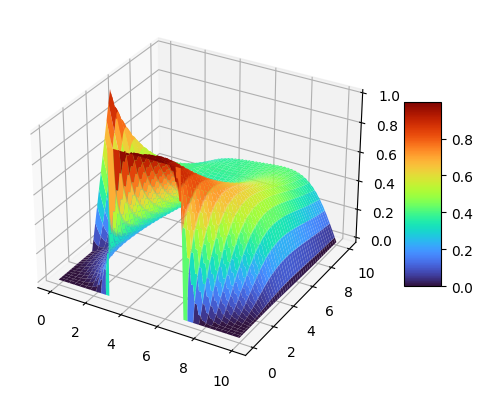

In [4]:
# Решения схемой Л
L = u.copy()

for i in range (1, Nt):
	for j in range (1,Nx):
		if (j != Nx-1):
			L[i,j] = sceme_L(L[i-1,j],L[i-1,j-1],L[i-1,j+1],xs,ts)
		else:
			L[i,j] = left_angel(L[i-1,j],L[i-1,j-1],xs,ts)
   
# print(L)

# Сохранение данных в таблицу excel
df = pd.DataFrame(data=L)
df.to_excel("L.xlsx")

# Создание 3D графика
x = np.linspace(0, X, Nx)
t = np.linspace(0, T, Nt)

xx, yy = np.meshgrid(x, t)

fig, ax = plt.subplots(subplot_kw = {"projection" : "3d" })
surf = ax.plot_surface(xx, yy, np.array(L), cmap = cm.turbo, linewidth = 0, antialiased = True)
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()